In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from feature_engine.creation import CyclicalFeatures
from feature_engine.datetime import DatetimeFeatures
from feature_engine.imputation import DropMissingData
from feature_engine.selection import DropFeatures
from feature_engine.timeseries.forecasting import (
    LagFeatures,
    WindowFeatures,
)

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline


from xgboost import XGBRegressor

In [31]:
data = pd.read_csv('/Users/abilfad/Desktop/legit/technical_test/data/Turbine_Data.csv')
data['time'] = pd.to_datetime(data['time'])
data.index = data['time']
data_update = data.fillna(method='ffill').fillna(method='bfill')

In [32]:
data

,time,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
time,,,,,,,,,,,,,,,,,,,,,
2017-12-31 00:00:00+00:00,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:10:00+00:00,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:20:00+00:00,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:30:00+00:00,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:40:00+00:00,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-30 23:10:00+00:00,2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,0.0,59.821165,55.193793,...,58.148777,39.008931,36.476562,178.0,13.775785,9.234004,2.0,G01,178.0,3.533445
2020-03-30 23:20:00+00:00,2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,0.0,59.142038,54.798545,...,57.550367,39.006759,36.328125,178.0,8.088928,9.229370,2.0,G01,178.0,3.261231
2020-03-30 23:30:00+00:00,2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,0.0,58.439439,54.380456,...,57.099335,39.003815,36.131944,178.0,4.355978,9.236802,2.0,G01,178.0,3.331839


In [33]:
data_update.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118224 entries, 2017-12-31 00:00:00+00:00 to 2020-03-30 23:50:00+00:00
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype              
---  ------                        --------------   -----              
 0   time                          118224 non-null  datetime64[ns, UTC]
 1   ActivePower                   118224 non-null  float64            
 2   AmbientTemperatue             118224 non-null  float64            
 3   BearingShaftTemperature       118224 non-null  float64            
 4   Blade1PitchAngle              118224 non-null  float64            
 5   Blade2PitchAngle              118224 non-null  float64            
 6   Blade3PitchAngle              118224 non-null  float64            
 7   ControlBoxTemperature         118224 non-null  float64            
 8   GearboxBearingTemperature     118224 non-null  float64            
 9   GearboxOilTemperature         118224 non-null 

In [34]:
data_update_day_mean = data_update.resample('D').mean()
data_update_day_median = data_update.resample('D').median()
data_update_day_std = data_update.resample('D').std()
data_update_day_min = data_update.resample('D').min()
data_update_day_max = data_update.resample('D').max()

data_arr = [data_update_day_median,data_update_day_std,data_update_day_min,data_update_day_max]
arr = ['median','std','min','max']
for i in range(4):
    cols_ = [f'{j}_{arr[i]}' for j in data_arr[i].columns]
    data_arr[i].columns = cols_
    data_arr[i] = data_arr[i].iloc[:,1:]
data_update_day_median,data_update_day_std,data_update_day_min,data_update_day_max = data_arr

In [35]:
data_update_day_mean.index = pd.to_datetime(data_update_day_mean.index.date)

In [36]:
data_update_day_mean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 821 entries, 2017-12-31 to 2020-03-30
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ActivePower                   821 non-null    float64
 1   AmbientTemperatue             821 non-null    float64
 2   BearingShaftTemperature       821 non-null    float64
 3   Blade1PitchAngle              821 non-null    float64
 4   Blade2PitchAngle              821 non-null    float64
 5   Blade3PitchAngle              821 non-null    float64
 6   ControlBoxTemperature         821 non-null    float64
 7   GearboxBearingTemperature     821 non-null    float64
 8   GearboxOilTemperature         821 non-null    float64
 9   GeneratorRPM                  821 non-null    float64
 10  GeneratorWinding1Temperature  821 non-null    float64
 11  GeneratorWinding2Temperature  821 non-null    float64
 12  HubTemperature                821 non-null   

/var/folders/yt/n9_2kr5s6nx_5b2y_kx3mnnm0000gn/T/ipykernel_42505/1199980199.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


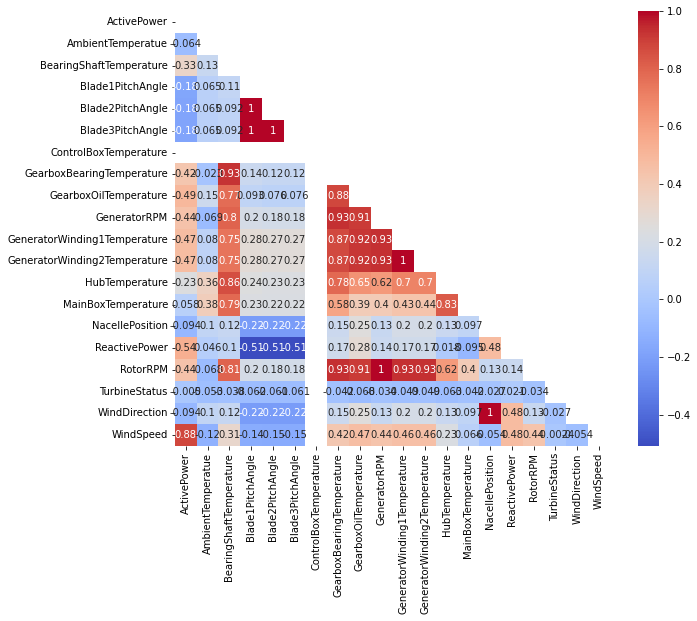

In [37]:
corr_matrix = data_update_day_mean.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))

# Create the heatmap using seaborn's heatmap() function
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, square=True, ax=ax)

# Display the plot
plt.show()

In [38]:
# Datetime features
dtf = DatetimeFeatures(
    # the datetime variable
    variables="index",
    
    # the features we want to create
    features_to_extract=[
        "month",
        "week",
        "day_of_week",
        "day_of_month",
    ],
)

In [39]:
# Periodic features

cyclicf = CyclicalFeatures(
    # The features we want to transform.
    variables=["month","week"],
    # Whether to drop the original features.
    drop_original=True,
)

In [40]:
# Drop missing data
imputer = DropMissingData()
# Drop original time series
drop_ts = DropFeatures(features_to_drop=["ActivePower"])

In [41]:
# Window features

winf = WindowFeatures(
    variables=["WindSpeed","ReactivePower","ActivePower"],  # the input variables
    window=["1D", "3D", "7D", "15D","30D", "45D" ,"60D"],  # average of 3 previous days
    freq="1D",  # move 1 day forward
    missing_values="ignore",
)


In [42]:
# Lag features.

lagf = LagFeatures(
    variables=["WindSpeed","ReactivePower","ActivePower"],  # the input variables
    freq=["1D", "3D", "7D", "15D","30D", "45D" ,"60D"],  # move 1 d and 3 d forward
    missing_values="ignore",
)

In [43]:
pipe = Pipeline(
    [
        ("datetime_features", dtf),
        ("lagf", lagf),
        ("winf", winf),
        ("Periodic", cyclicf),
        ("dropna", imputer),
        ("drop_ts", drop_ts),
    ]
)

In [44]:
X = data_update_day_mean.iloc[:,:]
y = data_update_day_mean.iloc[:,0]

In [45]:
X_t = pipe.fit_transform(X)

In [46]:
X_t

,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,...,ActivePower_window_45D_mean,GearboxOilTemperature_window_45D_mean,WindSpeed_window_60D_mean,ReactivePower_window_60D_mean,ActivePower_window_60D_mean,GearboxOilTemperature_window_60D_mean,month_sin,month_cos,week_sin,week_cos
2018-03-01,31.029091,47.901936,45.736893,43.699357,43.699357,0.0,77.119133,64.204399,1751.715563,113.290871,...,420.549778,64.204399,4.981175,75.652915,385.019873,64.204399,1.0,6.123234e-17,0.885456,4.647232e-01
2018-03-02,31.065652,47.901936,45.736893,43.699357,43.699357,0.0,77.119133,64.204399,1751.715563,113.290871,...,426.641185,64.204399,5.031816,77.513303,393.509151,64.204399,1.0,6.123234e-17,0.885456,4.647232e-01
2018-03-03,31.682768,47.901936,45.736893,43.699357,43.699357,0.0,77.119133,64.204399,1751.715563,113.290871,...,429.754141,64.204399,5.060660,78.743484,399.350682,64.204399,1.0,6.123234e-17,0.885456,4.647232e-01
2018-03-04,32.662301,47.901936,45.736893,43.699357,43.699357,0.0,77.119133,64.204399,1751.715563,113.290871,...,433.415044,64.204399,5.077165,79.555723,403.219181,64.204399,1.0,6.123234e-17,0.885456,4.647232e-01
2018-03-05,27.250195,47.901936,45.736893,43.699357,43.699357,0.0,77.119133,64.204399,1751.715563,113.290871,...,432.550194,64.204399,5.083987,80.001022,404.807108,64.204399,1.0,6.123234e-17,0.935016,3.546049e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-26,29.668218,46.090811,4.892864,5.364527,5.364527,0.0,65.269848,57.532391,1157.435776,75.396012,...,497.820455,56.033544,5.301645,90.993751,502.829189,55.698551,1.0,6.123234e-17,1.000000,6.123234e-17
2020-03-27,30.488274,47.953661,0.535745,0.852094,0.852094,0.0,67.084085,57.587804,1380.612466,79.842880,...,492.644304,56.033320,5.320394,91.612368,507.618456,55.772507,1.0,6.123234e-17,1.000000,6.123234e-17
2020-03-28,29.491234,50.932322,16.572576,17.004205,17.004205,0.0,68.821177,58.269328,1456.614652,85.979038,...,487.888248,56.033448,5.333316,92.063324,511.425609,55.806733,1.0,6.123234e-17,1.000000,6.123234e-17
2020-03-29,32.865975,49.323253,2.113836,2.517138,2.517138,0.0,67.555269,59.152643,1299.264743,82.453704,...,491.713422,56.064263,5.359477,92.782536,517.044625,55.887519,1.0,6.123234e-17,1.000000,6.123234e-17


In [47]:
X_t.shape

(761, 74)

In [48]:
X_t.index

DatetimeIndex(['2018-03-01', '2018-03-02', '2018-03-03', '2018-03-04',
               '2018-03-05', '2018-03-06', '2018-03-07', '2018-03-08',
               '2018-03-09', '2018-03-10',
               ...
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30'],
              dtype='datetime64[ns]', length=761, freq=None)

In [49]:
y_t = y.loc[X_t.index]
y_t

2018-03-01    503.998929
2018-03-02    542.443379
2018-03-03    569.134039
2018-03-04    413.988086
2018-03-05     -5.198518
                 ...    
2020-03-26    644.979144
2020-03-27    718.695340
2020-03-28    666.476157
2020-03-29    793.461992
2020-03-30    733.101238
Name: ActivePower, Length: 761, dtype: float64

In [50]:
### Forcast (nyoba)
forecast_point = pd.Timestamp("2020-03-31")
# The forecasting horizon (24 hs ahead)
forecast_end = forecast_point + pd.offsets.Day(30)
forecast_point, forecast_end

(Timestamp('2020-03-31 00:00:00'), Timestamp('2020-04-30 00:00:00'))

In [51]:
index = pd.date_range(
    start=forecast_point,
    end=forecast_end,
    freq="1D",
)

index

DatetimeIndex(['2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
               '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07',
               '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11',
               '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15',
               '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19',
               '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
               '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27',
               '2020-04-28', '2020-04-29', '2020-04-30'],
              dtype='datetime64[ns]', freq='D')

In [52]:
f_horizon = pd.DataFrame(columns=["ActivePower"], index=index)

In [53]:
X_train_t = X_t.iloc[:-30,:]
y_train_t = y_t.loc[X_train_t.index].values.reshape(-1, 1)

X_test_t = X_t.iloc[-30:,:]
y_test_t = y_t.loc[X_test_t.index].values.reshape(-1, 1)

In [54]:
# Baseline model 
model = MultiOutputRegressor(Lasso(random_state=0))

# Train the model
model.fit(X_train_t,y_train_t)

/Users/abilfad/Desktop/legit/legit-tst-env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.772e+06, tolerance: 2.051e+04
  model = cd_fast.enet_coordinate_descent(


MultiOutputRegressor(estimator=Lasso(random_state=0))

In [55]:
print(X_train_t.shape)
print(X_test_t.shape)

(731, 74)
(30, 74)


In [56]:
pred = model.predict(X_test_t)
np.mean(pred-y_test_t)**2/30

13.661822237366046

0.12417755338733773

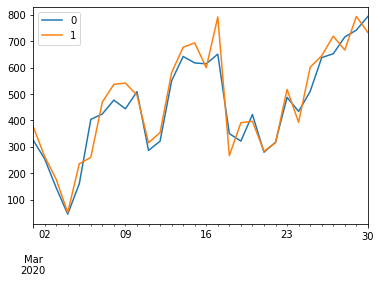

In [57]:
### Error Analysis
temp = pd.DataFrame(pred)
temp[1] = y_test_t # actual
temp.index = X_test_t.index
temp.plot()

mape = np.mean(np.absolute(temp[0]-temp[1])/temp[0])
mape

In [58]:
data_update = pd.concat([y_t,X_t],axis=1)
data_update.to_csv("data_update_2.csv")